# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.<br>
Source: https://www.kaggle.com/joniarroba/noshowappointments

### Question(s) for Analysis

> **Which appointment day has greater number of patients showing in the appointment ?**

> **Does the difference between the scheduling day and appointemnt day contriubte to the probablity of showing in the appointment?**

> **How is the trend of not-showing in the appointment over time ?**

> **What characterstics are associated with patients showing in the appointment ?**

# <a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### Data Viewing
> First, we will import required libraries and then veiw the data to have an initial understanding

<br>The following is the data dictionary of the dataset that contains the columns and their definition:
> **01 - PatientId<br>**
Identification of a patient<br>
**02 - AppointmentID<br>**
Identification of each appointment<br>
**03 - Gender<br>**
Male or Female.<br>
**04 - AppointmentDay<br>**
The day of the actuall appointment, when they have to visit the doctor.<br>
**05 - ScheduledDay<br>**
The day someone called or registered the appointment, this is before appointment of course.<br>
**06 - Age<br>**
How old is the patient.<br>
**07 - Neighbourhood<br>**
Where the appointment takes place.<br>
**08 - scholarship<br>**
whether or not the patient is enrolled in Brasilian welfare program<br>
**09 - hipertension<br>**
whether or not the patient has hipertension<br>
**10 - diabetes<br>**
whether or not the patient has diabetes<br>
**11 - alcoholism<br>**
whether or not the patient is addicted to alcohol<br>
**12 - handcap<br>**
whether or not the patient has any handcap<br>
**13 - sms_received<br>**
whether or not the patient has received messages for the appointment<br>
**14 - No-show<br>**
Yes if patient didn't show, No if patient did .<br>

In [1]:
# Importing required libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading and viewing the data
df_apnt = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df_apnt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# investigating the structure: #rows, #columns, data types, missing values
df_apnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# checking for duplicates
sum(df_apnt.duplicated())

0

### Remarks
> The data looks neat, there are no missing values and no duplicates. However, some data types need to be corrected.<br>
Also, columns names will be modified.


### Data Cleaning
> Now, we will clean the data by changing the column names to lowercase and dashes to underscores for smoother analysis<br>and then fixing data types for the patientid, appoinhtmentid, scheduledday, appointmentday
 

In [5]:
# changing columns to lowercase and dash to underscore
df_apnt.rename(columns = lambda x: x.lower().replace('-','_'), inplace=True)
df_apnt.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [6]:
# Fixing data types
def apply_typ_to_col(df, typ_col_dic):
    '''
    Modify the types of dataframe columns from the type and column pairs of the dictionary
    
        Parameters:
            df (dataframe): its columns will be modifed based on the type and column dictionary
            typ_col_dic (dictionary): contains the type-column pairs where type is a singel value, column is a list
            
        Returns:
            df (dataframe): the modifed dataframe
    '''
    for typ, col_list in typ_col_dic.items():  
        for col in col_list:
            df[col] = df[col].astype(typ)
    return df

typ_col_dic = {'int':['patientid'], # for patient id, first convert to int to get rid of decimals and then to string
               'str':['patientid', 'appointmentid'],
               'datetime64[ns]':['scheduledday', 'appointmentday']}
df_apnt = apply_typ_to_col(df_apnt, typ_col_dic)
df_apnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 11.8+ MB


### Remarks
<br>

**Modifications Performed:**
<ul>
<li>Column names have been modifed to lowercase and dashes to underscores<br><br>
<li>The data type for some fields have been changed as following:<br>
patientid         : from float to int to string (first to int to get rid of decimal part)<br>
appointmentid     : from integer to string<br>
scheduledday      : from string to date<br>
appointmentday    : from string to date<br>

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have trimmed and cleaned the data, we will move on to exploration by computing statistics and creating visualizations. 

### Research Question 1<br>Which appointment day has greater number of patients showing in the appointment ?<br>
> To investigate this question, we will create a new column that shows the name of the week day from the appointment day


In [7]:
# extracting and creating a new column for the day of week from the date of the appointment 
df_apnt['apnt_day_name'] = df_apnt['appointmentday'].dt.day_name()
df_apnt.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,apnt_day_name
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


### Remarks
> Now we have added a new field for the day of the week of the appointment day which we will be using to compare its not-showing rate to other days

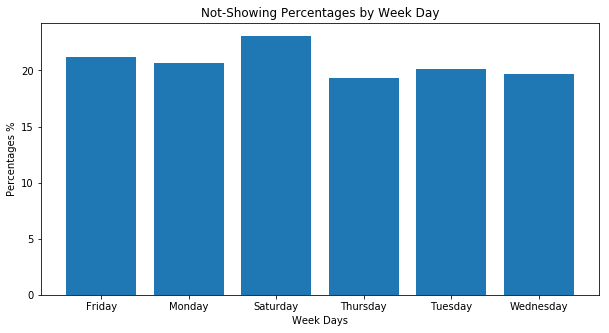

In [8]:
# create a list of week days for all available appointment days and calculate the percentages of not-showing rate for each
plt.figure(figsize=(10,5))
apnt_days = df_apnt.groupby('apnt_day_name').sum().index
height = [(df_apnt.query('apnt_day_name == @x and no_show == "Yes"').shape[0]
          / df_apnt.query('apnt_day_name == @x').shape[0]) * 100 for x in apnt_days]
plt.bar(x=apnt_days, height=height)
plt.title('Not-Showing Percentages by Week Day')
plt.xlabel('Week Days')
plt.ylabel('Percentages %');

### Remarks
> It appears that the weekend (Saturday) has the highest not-showing rate compared to the weekdays (Monday to Friday). This is probably becasue that people tend to leave home and enjoy weekends away.<br>Also, it seems that there no appointments on Sundays.

### Research Question 2<br>Does the difference between the scheduling day and appointemnt day contriubte to the probablity of showing in the appointment?<br>
> To investigate this question, we will create a new column and calcualte the days difference between the two days

In [9]:
def calculate_date_diff(df, end_date, start_date, ignore_time=True):
    '''
    Calculate the difference between two dates with an option to include/exclude the time between the two dates.
    
        Parameters:
            df (dataframe): the dataframe that will be modified
            end_date (string): is the end date column from the dataframe
            start_date (string): is the start date column from the dataframe
            ignore_time (boolean): to exclude or include the time in the calculation, defaulted to exclude
            
        Returns:
            diff (series): the series that contain the list of days difference
    '''
    diff = None
    if ignore_time:
        diff = (df[end_date].apply(lambda x: x.date()) - df[start_date].apply(lambda x: x.date())).dt.days
    else:
        diff = (df[end_date] - df[start_date]).dt.days
    return diff

# creating a new column that hold the days difference between the scheduling day and appointment day
df_apnt['schd_to_apnt_days'] = calculate_date_diff(df_apnt, 'appointmentday', 'scheduledday') 
df_apnt.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,apnt_day_name,schd_to_apnt_days
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0


### Remarks
> We have added a new column to show the day difference between the scheduling and appointment day which will be used to see how the difference affects the probablity that patients show in the appointment.<br>
(Scheduling and appointment that are on the same day will show a difference of 0 regardless of the time between the two)<br><br>
Next, we will have a look at some statistics of the new column

In [10]:
df_apnt['schd_to_apnt_days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: schd_to_apnt_days, dtype: float64

### Remarks
> There is a strange value observed. The min value is less than 0 which means that the schedluing day is later than the appointment day. Clearly, this is a typo since this cannot be correct.
<br><br>
We will look if there are any other values less than 0

In [11]:
df_apnt.query('schd_to_apnt_days < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,apnt_day_name,schd_to_apnt_days
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,-1


In [12]:
df_apnt.query('schd_to_apnt_days < 0').shape[0]

5

In [13]:
(df_apnt.query('schd_to_apnt_days < 0').shape[0] / df_apnt.shape[0]) * 100

0.004523781519447737

### Remarks
> Luckily, there are only 5 records having the scheduling day after the appointment day.<br>
Since we have so much data, they are basically nothing (0.0045%) and we can safely remove them.
<br><br>
Let's now look at the statistics after removing these 5 records.

In [14]:
df_apnt = df_apnt[df_apnt['schd_to_apnt_days'] >= 0]
df_apnt.query('schd_to_apnt_days < 0').shape[0]

0

In [15]:
diff_days_stats = df_apnt['schd_to_apnt_days'].describe()
diff_days_stats

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: schd_to_apnt_days, dtype: float64

### Remarks
> Everyhing seems resonable.<br>
Let's now graph the comparison chart

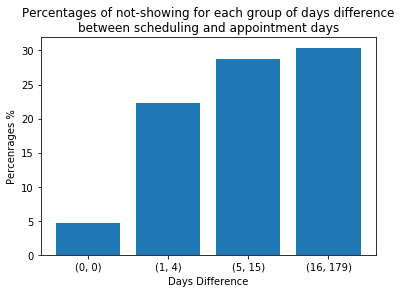

In [16]:
def creat_quarters_groups(quarters, increment=0):
    '''
    Create 4 groups representing the quarters of min-25%, 25%-50%, 50%-75%, 75%-max of the data .
    
        Parameters:
            quarters (list): a lis that contains the 4 quarters values of some data
            increment (integer): a value used to exclude the end value of the previous\
                                 group not to be included in the next group
            start_date (string): is the start date column from the dataframe
            
        Returns:
            groups (list): list of tuples to define each group limits and it contain the 4 quarters tuples
    '''
    groups = []
    for i in range(len(quarters)-1):
        if i == 0:
            groups.append((int(quarters[i]), int(quarters[i+1])))
        else:
            groups.append((int(quarters[i]+increment), int(quarters[i+1])))
    return groups         

# fill the groups and convert the groups to string to be used as bar lables
quarters =  diff_days_stats[3:].values
groups = creat_quarters_groups(quarters, 1)
groups_string = [str(g) for g in groups]
locations = [1, 2, 3, 4]

# fill heights by taking the percentage of not-showing over the total not-showing for each group of the days difference column
heights = []
for group in groups:
    heights.append((df_apnt.query('schd_to_apnt_days in @group and no_show == "Yes"').shape[0]
                    / df_apnt.query('schd_to_apnt_days in @group').shape[0])*100)

# plot the bar chart
plt.bar(x=locations, height=heights, tick_label=groups_string)
plt.title('Percentages of not-showing for each group of days difference\nbetween scheduling and appointment days')
plt.xlabel('Days Difference')
plt.ylabel('Percenrages %');

### Remarks
This figure shows percentages of not-showing in the appointment for each group that represents the number of days difference between scheduling day and appointment day.<br>
They are divided as follows:
<br>(0, 0)    : a group that represents the lower 25% of the data which shows appointmetns that are scheduled on the same day
<br>(1, 4)    : a group that represents 25%-50% of the data which shows appointmetns that have a difference between 1-4 dyas than the scheduled day
<br>(5, 15)   : a group that represents 50%-75% of the data which shows appointmetns that have a difference between 5-15 dyas than the scheduled day
<br>(16, 179) : a group that represents the upper 75% of the data which shows appointmetns that have a difference between 16-179 dyas than the scheduled day

We can see that the appointments that are scheduled on the same day have lower percentages of not-showing and when the difference between the two dates grows, so does the not-showing rate

### Research Question 3<br>How is the trend of not-showing in the appointment over time ?<br>
> To investigate this question, we will create a new subset of the data for only not-showing records and then group by the appointment day and count the number of instances to get the trend over time

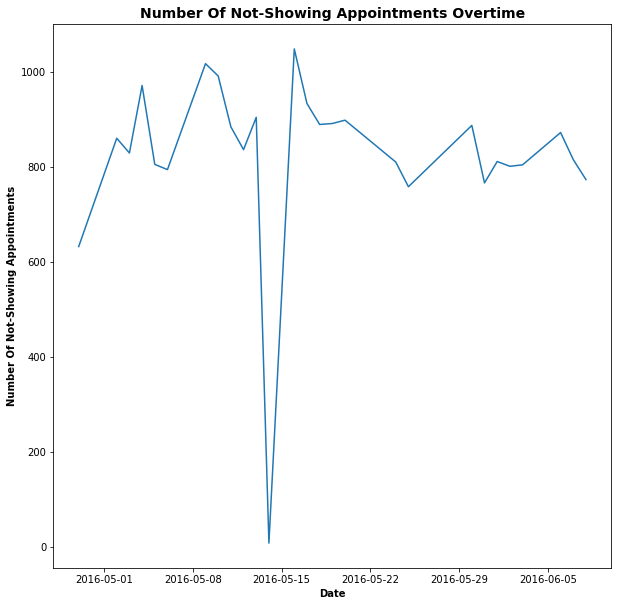

In [17]:
no_show_over_time = df_apnt.query('no_show == "Yes"').groupby('appointmentday').count()\
                    .sort_values(by='appointmentday')['no_show']
plt.figure(figsize=(10, 10))
plt.plot_date(x=no_show_over_time.index, y=no_show_over_time.values, linestyle ='solid', markersize=0)
plt.title('Number of Not-Showing Appointments Overtime'.title(), fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Date'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Number of Not-Showing Appointments'.title(),
               fontsize = 10, weight = "bold");

### Remarks
> This plot does not look clear becasue of the below outlier value that is less than 200<br><br>
It's better that we remove it by filtering for all values greater than 200

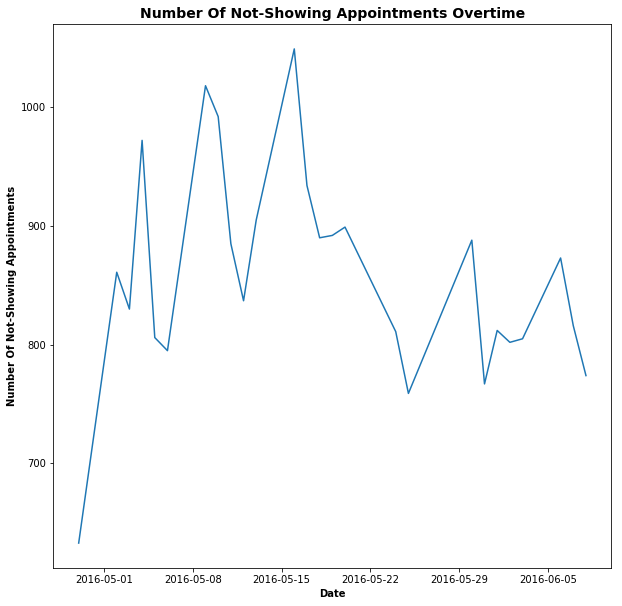

In [18]:
no_show_over_time = no_show_over_time[no_show_over_time > 200]
plt.figure(figsize=(10, 10))
plt.plot_date(x=no_show_over_time.index, y=no_show_over_time.values, linestyle ='solid', markersize=0)
plt.title('Number of Not-Showing Appointments Overtime'.title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Date'.title(),
               fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Number of Not-Showing Appointments'.title(),
               fontsize = 10, weight = "bold");

### Remarks
> Now we have a clearer view of the trend.<br>
we can see that there is an up-trend of the not-showing appointments starting a bit earlier before date 2016-05-01 until 2016-5-15. After that, the plot demonstrates a down-trend till the end of the period which means appointments showing rate have improved recently

### Research Question 4<br>What characterstics are associated with patients showing in the appointment ?<br>
> We will investigate this question by looking at the 6 characterstics that are represented as flag (0,1) which corresponds to yes or no.<br><br>
**scholarship<br>**
whether or not the patient is enrolled in Brasilian welfare program<br>
**hipertension<br>**
whether or not the patient has hipertension<br>
**diabetes<br>**
whether or not the patient has diabetes<br>
**alcoholism<br>**
whether or not the patient is addicted to alcohol<br>
**handcap<br>**
whether or not the patient has any handcap<br>
**sms_received<br>**
whether or not the patient has received messages for the appointment<br>
<br>
> We need to rearange the data so that each characteristic is shown with corresponding value of not-showing rates<br>
Then, we wil normalize to have a more better view of the data

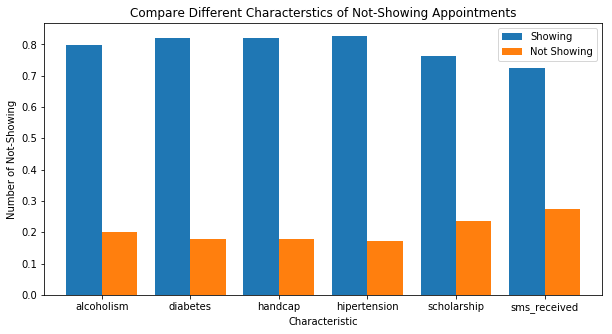

In [19]:
# including only the interested columns from the data and then melt by no_show column as id then calcualte
# number of instances for each characterstics, lastly unstack to swtich columns and indexes
no_show_chars_melt = df_apnt[['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
                     'no_show']].melt(id_vars=['no_show'], var_name='Chars', value_name='Value' )\
                     .query('Value == 1').groupby('Chars')['no_show'].value_counts(normalize=True).unstack()

# plotting the chart
no_show_chars_melt.plot(kind='bar', figsize=[10,5], rot=0, width=0.8)
plt.title('Compare Different Characterstics of Not-Showing Appointments')
plt.legend(['Showing', 'Not Showing'])
plt.xlabel('Characteristic')
plt.ylabel('Number of Not-Showing');


### Remarks
> It's shown clearly that the probablity that patients show in the appointments can be improved when they are under a scholarship, have hipertension, diabetes, alcoholism, or handcap, and when they receicev appointment messages.

<a id='conclusions'></a>
## Conclusions
>By analyzing this dataset "No-Show Appointment", we have come across interseting results.<br>
<br>
First, the rate of not-showing in the appointment tends to be higher if the appointment day was on weekend (Saturday) compared to other week days (exept Sundays, as there are no appointments on Sundays). The reason could be that patients go away on weekends. More research could be done here to find out why patients don't show on Saturdays.<br>
<br>
In addition, we found that the longer the period between the scheduling and appointment days is associated with higher rates of not-showing. One reason could be that patients forget about the appointment when there is a larg gap between the scheduling and appointment day.<br>
<br>
Also, we discovered double trends for the rate of not-showing, an uptrend and a downtrend. The uptrend starts a bit before 2016-05-01 until 2016-5-15 (almost two weeks) and then the downtrend continues until the end of the provided data.
This can be a sign that the not-showing rate is going to decrease in future. To confirm that, more future data will be needed.<br>
<br>
Lastly, we have shown that some characterstics have a postivie impact on the showing rates of patients which are scholarship, hipertension, diabetes, alcoholism, handcap, sms_received. Having one or more of these characterstics can increase the probablity that patients will show in the appointment.

## Limitations
<ul>
<li>As this data is a sample of 100,000 appointments, we cannot be certain that the conclusions reached will be true for other samples.
<li>The conclusions are tentative as there have been no statistical inferences performed to confirm the results.